In [ ]:
#Importing libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Data
df=pd.read_csv("sample_data/RQ2_data.csv")
df.groupby('category')['category'].value_counts()

category    category  
Business    Business      16225
Library     Library       11839
Multimedia  Multimedia      156
Utility     Utility        1153
Name: category, dtype: int64

In [ ]:
#Convert the type of columns to int
df[['dbAccess', 'FEAR_OF_THE_UNKNOWN',
       'IMPLICIT_COLUMNS', 'AMBIGUOUS_GROUPS', 'RANDOM_SELECTION',
       'AntiSingleton', 'BaseClassKnowsDerivedClass',
       'BaseClassShouldBeAbstract', 'Blobs', 'ClassDataShouldBePrivate',
       'ComplexClass', 'FunctionalDecomposition', 'LargeClass', 'LazyClass',
       'LongMethod', 'LongParameterList', 'ManyFieldAttributesButNotComplex',
       'MessageChains', 'RefusedParentBequest', 'SpaghettiCode',
       'SpeculativeGenerality', 'SwissArmyKnife', 'TraditionBreaker']]=df[['dbAccess', 'FEAR_OF_THE_UNKNOWN',
       'IMPLICIT_COLUMNS', 'AMBIGUOUS_GROUPS', 'RANDOM_SELECTION',
       'AntiSingleton', 'BaseClassKnowsDerivedClass',
       'BaseClassShouldBeAbstract', 'Blobs', 'ClassDataShouldBePrivate',
       'ComplexClass', 'FunctionalDecomposition', 'LargeClass', 'LazyClass',
       'LongMethod', 'LongParameterList', 'ManyFieldAttributesButNotComplex',
       'MessageChains', 'RefusedParentBequest', 'SpaghettiCode',
       'SpeculativeGenerality', 'SwissArmyKnife', 'TraditionBreaker']].apply(pd.to_numeric)
df.groupby('category')['category'].value_counts()
df.columns

Index(['category', '_date', 'version', 'projectGroup', 'projectName',
       'file_id', 'class_path', 'dbAccess', 'FEAR_OF_THE_UNKNOWN',
       'IMPLICIT_COLUMNS', 'AMBIGUOUS_GROUPS', 'RANDOM_SELECTION',
       'AntiSingleton', 'BaseClassKnowsDerivedClass',
       'BaseClassShouldBeAbstract', 'Blobs', 'ClassDataShouldBePrivate',
       'ComplexClass', 'FunctionalDecomposition', 'LargeClass', 'LazyClass',
       'LongMethod', 'LongParameterList', 'ManyFieldAttributesButNotComplex',
       'MessageChains', 'RefusedParentBequest', 'SpaghettiCode',
       'SpeculativeGenerality', 'SwissArmyKnife', 'TraditionBreaker',
       'in_bug_fix', 'in_bug_induce'],
      dtype='object')

In [ ]:
#Since database smells can only occur on files that have database acess.
# All classes with dbAccess less than one needs to be filtered out.

In [ ]:
#filtering files with dbAccess greater than one
df=df[df['dbAccess']>0]
media=df[df['category']=='Multimedia']
business= df[df['category']=='Business']
utility=df[df['category']=='Utility']
library=df[df['category']=='Library']
df.groupby('category')['category'].value_counts()

category    category  
Business    Business      16225
Library     Library       11839
Multimedia  Multimedia      156
Utility     Utility        1153
Name: category, dtype: int64

## **Apriori Algorithm on the overall dataset**

In [ ]:
#now lets filterout the columns that are not needed for the association rule mining
fil_df =  df.drop(['category', '_date', 'version', 'projectGroup', 'projectName',
       'file_id', 'class_path', 'dbAccess'], axis=1)
fil_df[fil_df > 0]=1
# print(fil_df.head())
fil_df.to_csv('sample_data/RQ2_data_normalized.csv', index=False) #this is needed for the statistical analysis
fil_df.head()

,FEAR_OF_THE_UNKNOWN,IMPLICIT_COLUMNS,AMBIGUOUS_GROUPS,RANDOM_SELECTION,AntiSingleton,BaseClassKnowsDerivedClass,BaseClassShouldBeAbstract,Blobs,ClassDataShouldBePrivate,ComplexClass,...,LongParameterList,ManyFieldAttributesButNotComplex,MessageChains,RefusedParentBequest,SpaghettiCode,SpeculativeGenerality,SwissArmyKnife,TraditionBreaker,in_bug_fix,in_bug_induce
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
fil_df[fil_df > 0]=1

In [ ]:
print(fil_df['IMPLICIT_COLUMNS'].value_counts())
print(fil_df['FEAR_OF_THE_UNKNOWN'].value_counts())
print(fil_df['AMBIGUOUS_GROUPS'].value_counts())
print(fil_df['RANDOM_SELECTION'].value_counts())
print(fil_df['LongMethod'].value_counts()) #sample traditional smell


0    26551
1     2822
Name: IMPLICIT_COLUMNS, dtype: int64
0    28960
1      413
Name: FEAR_OF_THE_UNKNOWN, dtype: int64
0    29365
1        8
Name: AMBIGUOUS_GROUPS, dtype: int64
0    29373
Name: RANDOM_SELECTION, dtype: int64
1    15043
0    14330
Name: LongMethod, dtype: int64


In [ ]:
frequent_itemsets=apriori(fil_df,min_support=0.01, max_len=2, use_colnames=True)
frequent_itemsets.head(100)
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules=rules.sort_values(by=['lift'], ascending=False)
rules.to_csv("Rules_combined.csv", encoding='utf-8', index=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(SpaghettiCode),(AntiSingleton),0.013958,0.064685,0.013958,1.000000,15.459474,0.013055,inf
9,(AntiSingleton),(SpaghettiCode),0.064685,0.013958,0.013958,0.215789,15.459474,0.013055,1.257368
29,(in_bug_fix),(in_bug_induce),0.259524,0.109454,0.084772,0.326643,2.984288,0.056366,1.322546
28,(in_bug_induce),(in_bug_fix),0.109454,0.259524,0.084772,0.774495,2.984288,0.056366,3.283628
14,(SpaghettiCode),(ComplexClass),0.013958,0.385082,0.010758,0.770732,2.001477,0.005383,2.682091
15,(ComplexClass),(SpaghettiCode),0.385082,0.013958,0.010758,0.027937,2.001477,0.005383,1.014381
12,(ComplexClass),(LongParameterList),0.385082,0.265107,0.164879,0.428167,1.615071,0.062791,1.285153
13,(LongParameterList),(ComplexClass),0.265107,0.385082,0.164879,0.621934,1.615071,0.062791,1.626484
4,(ComplexClass),(AntiSingleton),0.385082,0.064685,0.033738,0.087614,1.354464,0.008829,1.025130
5,(AntiSingleton),(ComplexClass),0.064685,0.385082,0.033738,0.521579,1.354464,0.008829,1.285308


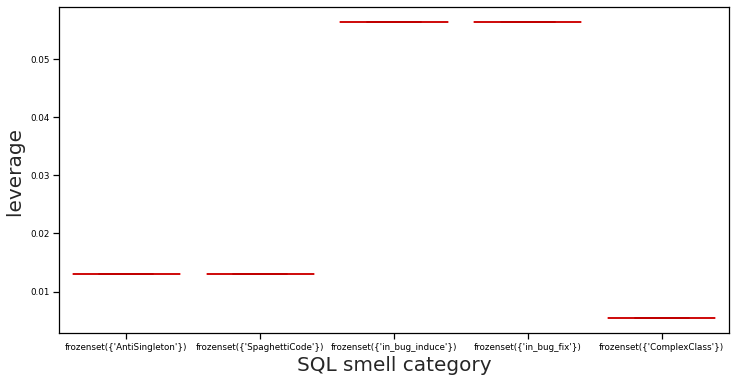

In [ ]:
r=rules.head(5)
# print(r)
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
plot= sns.boxplot(x= r['consequents'].astype(str), y=r['leverage'], data=df, color='black',medianprops=dict(color='red'), 
                  boxprops = dict(facecolor='gray',edgecolor='black' ))
#plot.set_title("Percentage of the ratio of fear of the unknown smells to number of queries")
#plot.set(xlabel="Category", ylabel="Percentage of smells to queries")
plot.set_xlabel("SQL smell category",fontsize=20)
plot.set_ylabel("leverage ",fontsize=20)
fig = plot.get_figure()
# plt.plot(r["consequents"].astype(str), r["lift"])

#*Apriori Algorithm on the Business dataset*

In [ ]:
#filterout the columns that are not needed for the association rule mining
fil_df =  business.drop(['category', '_date', 'version', 'projectGroup', 'projectName',
       'file_id', 'class_path', 'dbAccess','in_bug_fix', 'in_bug_induce'], axis=1)
fil_df.head()

,FEAR_OF_THE_UNKNOWN,IMPLICIT_COLUMNS,AMBIGUOUS_GROUPS,RANDOM_SELECTION,AntiSingleton,BaseClassKnowsDerivedClass,BaseClassShouldBeAbstract,Blobs,ClassDataShouldBePrivate,ComplexClass,...,LazyClass,LongMethod,LongParameterList,ManyFieldAttributesButNotComplex,MessageChains,RefusedParentBequest,SpaghettiCode,SpeculativeGenerality,SwissArmyKnife,TraditionBreaker
506,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
fil_df[fil_df > 0]=1
print(fil_df['IMPLICIT_COLUMNS'].value_counts())
print(fil_df['FEAR_OF_THE_UNKNOWN'].value_counts())
print(fil_df['AMBIGUOUS_GROUPS'].value_counts())
print(fil_df['RANDOM_SELECTION'].value_counts())
print(fil_df['LongMethod'].value_counts())

0    15607
1      618
Name: IMPLICIT_COLUMNS, dtype: int64
0    16200
1       25
Name: FEAR_OF_THE_UNKNOWN, dtype: int64
0    16225
Name: AMBIGUOUS_GROUPS, dtype: int64
0    16225
Name: RANDOM_SELECTION, dtype: int64
1    8556
0    7669
Name: LongMethod, dtype: int64


In [ ]:
frequent_itemsets=apriori(fil_df,min_support=0.01,max_len=2, use_colnames=True)
frequent_itemsets.head(100)
#geneate the rules
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules=rules.sort_values(by=['lift'], ascending=True)
rules.to_csv("Rules_combined_business.csv", encoding='utf-8', index=False)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(IMPLICIT_COLUMNS),(LongMethod),0.038089,0.527334,0.020709,0.543689,1.031014,0.000623,1.035842
3,(LongMethod),(IMPLICIT_COLUMNS),0.527334,0.038089,0.020709,0.039271,1.031014,0.000623,1.001230
10,(LongParameterList),(LongMethod),0.339846,0.527334,0.201726,0.593580,1.125624,0.022513,1.162998
11,(LongMethod),(LongParameterList),0.527334,0.339846,0.201726,0.382539,1.125624,0.022513,1.069142
4,(ComplexClass),(AntiSingleton),0.365670,0.063297,0.027920,0.076353,1.206252,0.004774,1.014134
5,(AntiSingleton),(ComplexClass),0.063297,0.365670,0.027920,0.441091,1.206252,0.004774,1.134942
0,(ComplexClass),(IMPLICIT_COLUMNS),0.365670,0.038089,0.016949,0.046351,1.216899,0.003021,1.008663
1,(IMPLICIT_COLUMNS),(ComplexClass),0.038089,0.365670,0.016949,0.444984,1.216899,0.003021,1.142903
8,(ComplexClass),(LongParameterList),0.365670,0.339846,0.194515,0.531940,1.565239,0.070243,1.410405
9,(LongParameterList),(ComplexClass),0.339846,0.365670,0.194515,0.572361,1.565239,0.070243,1.483331


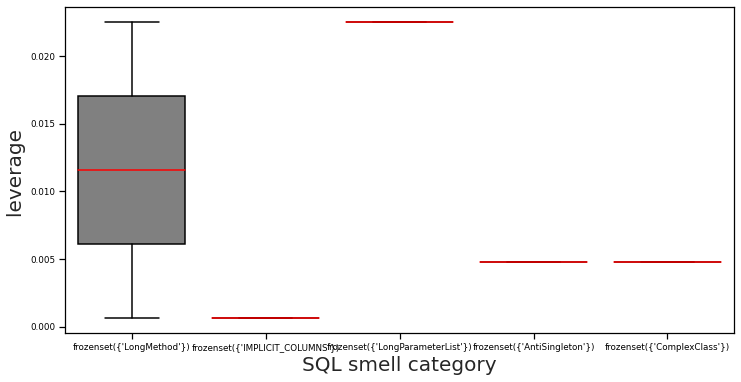

In [ ]:
r=rules.head(6)
# print(r)
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
plot= sns.boxplot(x= r['consequents'].astype(str), y=r['leverage'], data=df, color='black',medianprops=dict(color='red'), 
                  boxprops = dict(facecolor='gray',edgecolor='black' ))
#plot.set_title("Percentage of the ratio of fear of the unknown smells to number of queries")
#plot.set(xlabel="Category", ylabel="Percentage of smells to queries")
plot.set_xlabel("SQL smell category",fontsize=20)
plot.set_ylabel("leverage ",fontsize=20)
fig = plot.get_figure()
# plt.plot(r["consequents"].astype(str), r["lift"])

#*Apriori Algorithm on the Library dataset*

In [ ]:
#filterout the columns that are not needed for the association rule mining
fil_df =  library.drop(['category', '_date', 'version', 'projectGroup', 'projectName',
       'file_id', 'class_path', 'dbAccess','in_bug_fix', 'in_bug_induce'], axis=1)
fil_df.head()

,FEAR_OF_THE_UNKNOWN,IMPLICIT_COLUMNS,AMBIGUOUS_GROUPS,RANDOM_SELECTION,AntiSingleton,BaseClassKnowsDerivedClass,BaseClassShouldBeAbstract,Blobs,ClassDataShouldBePrivate,ComplexClass,...,LazyClass,LongMethod,LongParameterList,ManyFieldAttributesButNotComplex,MessageChains,RefusedParentBequest,SpaghettiCode,SpeculativeGenerality,SwissArmyKnife,TraditionBreaker
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
fil_df[fil_df > 0]=1
print(fil_df['IMPLICIT_COLUMNS'].value_counts())
print(fil_df['FEAR_OF_THE_UNKNOWN'].value_counts())
print(fil_df['RANDOM_SELECTION'].value_counts())
print(fil_df['AMBIGUOUS_GROUPS'].value_counts())
print(fil_df['ComplexClass'].value_counts())

0    9905
1    1934
Name: IMPLICIT_COLUMNS, dtype: int64
0    11542
1      297
Name: FEAR_OF_THE_UNKNOWN, dtype: int64
0    11839
Name: RANDOM_SELECTION, dtype: int64
0    11839
Name: AMBIGUOUS_GROUPS, dtype: int64
0    6853
1    4986
Name: ComplexClass, dtype: int64


In [ ]:
frequent_itemsets=apriori(fil_df,min_support=0.01,max_len=2, use_colnames=True)
frequent_itemsets.head(100)
#geneate the rules
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules=rules.sort_values(by=['leverage'], ascending=True)
rules.to_csv("Rules_combined_library.csv", encoding='utf-8', index=False)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(IMPLICIT_COLUMNS),(LongParameterList),0.163358,0.175859,0.029479,0.180455,1.026132,0.000751,1.005607
5,(LongParameterList),(IMPLICIT_COLUMNS),0.175859,0.163358,0.029479,0.167627,1.026132,0.000751,1.005129
2,(IMPLICIT_COLUMNS),(LongMethod),0.163358,0.503759,0.085396,0.522751,1.037701,0.003103,1.039795
3,(LongMethod),(IMPLICIT_COLUMNS),0.503759,0.163358,0.085396,0.169517,1.037701,0.003103,1.007416
8,(AntiSingleton),(LongParameterList),0.066644,0.175859,0.019512,0.292776,1.664828,0.007792,1.165317
9,(LongParameterList),(AntiSingleton),0.175859,0.066644,0.019512,0.110951,1.664828,0.007792,1.049836
0,(FEAR_OF_THE_UNKNOWN),(IMPLICIT_COLUMNS),0.025087,0.163358,0.012417,0.494949,3.029838,0.008318,1.656550
1,(IMPLICIT_COLUMNS),(FEAR_OF_THE_UNKNOWN),0.163358,0.025087,0.012417,0.076008,3.029838,0.008318,1.055111
14,(SpaghettiCode),(ComplexClass),0.020188,0.421150,0.018160,0.899582,2.136010,0.009658,5.764377
15,(ComplexClass),(SpaghettiCode),0.421150,0.020188,0.018160,0.043121,2.136010,0.009658,1.023967


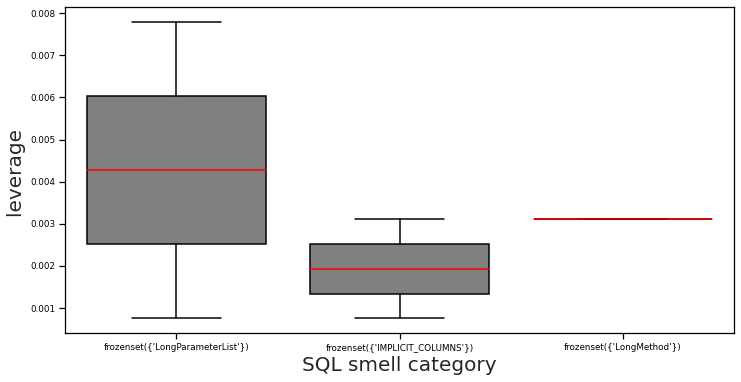

In [ ]:
r=rules.head(5)
# print(r)
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
plot= sns.boxplot(x= r['consequents'].astype(str), y=r['leverage'], data=df, color='black',medianprops=dict(color='red'), 
                  boxprops = dict(facecolor='gray',edgecolor='black' ))
#plot.set_title("Percentage of the ratio of fear of the unknown smells to number of queries")
#plot.set(xlabel="Category", ylabel="Percentage of smells to queries")
plot.set_xlabel("SQL smell category",fontsize=20)
plot.set_ylabel("leverage ",fontsize=20)
fig = plot.get_figure()
# plt.plot(r["consequents"].astype(str), r["lift"])

#*Apriori Algorithm on the Multimedia dataset*

In [ ]:
#now lets filterout the columns that are not needed for the association rule mining
fil_df =  media.drop(['category', '_date', 'version', 'projectGroup', 'projectName',
       'file_id', 'class_path', 'dbAccess','in_bug_fix', 'in_bug_induce'], axis=1)
fil_df.head()

,FEAR_OF_THE_UNKNOWN,IMPLICIT_COLUMNS,AMBIGUOUS_GROUPS,RANDOM_SELECTION,AntiSingleton,BaseClassKnowsDerivedClass,BaseClassShouldBeAbstract,Blobs,ClassDataShouldBePrivate,ComplexClass,...,LazyClass,LongMethod,LongParameterList,ManyFieldAttributesButNotComplex,MessageChains,RefusedParentBequest,SpaghettiCode,SpeculativeGenerality,SwissArmyKnife,TraditionBreaker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
fil_df[fil_df > 0]=1
print(fil_df['IMPLICIT_COLUMNS'].value_counts())
print(fil_df['FEAR_OF_THE_UNKNOWN'].value_counts())
print(fil_df['RANDOM_SELECTION'].value_counts())
print(fil_df['AMBIGUOUS_GROUPS'].value_counts())
print(fil_df['ComplexClass'].value_counts())

0    114
1     42
Name: IMPLICIT_COLUMNS, dtype: int64
0    142
1     14
Name: FEAR_OF_THE_UNKNOWN, dtype: int64
0    156
Name: RANDOM_SELECTION, dtype: int64
0    156
Name: AMBIGUOUS_GROUPS, dtype: int64
0    111
1     45
Name: ComplexClass, dtype: int64


In [ ]:
frequent_itemsets=apriori(fil_df,min_support=0.01,max_len=2, use_colnames=True)
frequent_itemsets.head(100)
#geneate the rules
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules=rules.sort_values(by=['leverage'], ascending=True)
rules.to_csv("Rules_combined_media.csv", encoding='utf-8', index=False)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(AntiSingleton),(IMPLICIT_COLUMNS),0.038462,0.269231,0.012821,0.333333,1.238095,0.002465,1.096154
9,(IMPLICIT_COLUMNS),(AntiSingleton),0.269231,0.038462,0.012821,0.047619,1.238095,0.002465,1.009615
23,(LongParameterList),(ComplexClass),0.051282,0.288462,0.019231,0.375000,1.300000,0.004438,1.138462
22,(ComplexClass),(LongParameterList),0.288462,0.051282,0.019231,0.066667,1.300000,0.004438,1.016484
17,(LongMethod),(AntiSingleton),0.544872,0.038462,0.025641,0.047059,1.223529,0.004684,1.009022
16,(AntiSingleton),(LongMethod),0.038462,0.544872,0.025641,0.666667,1.223529,0.004684,1.365385
6,(FEAR_OF_THE_UNKNOWN),(LongMethod),0.089744,0.544872,0.057692,0.642857,1.179832,0.008794,1.274359
7,(LongMethod),(FEAR_OF_THE_UNKNOWN),0.544872,0.089744,0.057692,0.105882,1.179832,0.008794,1.018050
25,(ComplexClass),(SpaghettiCode),0.288462,0.012821,0.012821,0.044444,3.466667,0.009122,1.033095
24,(SpaghettiCode),(ComplexClass),0.012821,0.288462,0.012821,1.000000,3.466667,0.009122,inf


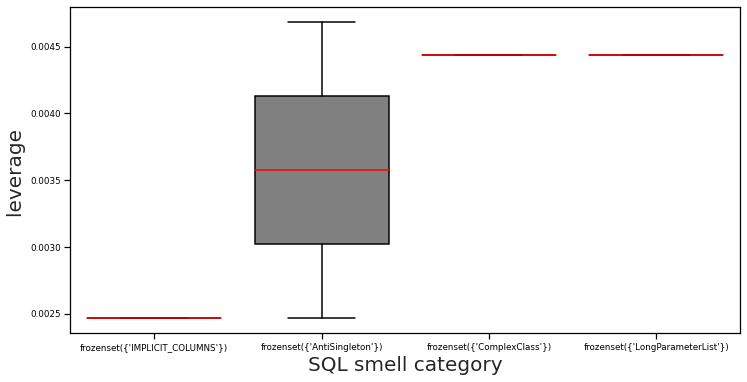

In [ ]:
r=rules.head(5)
# print(r)
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
plot= sns.boxplot(x= r['consequents'].astype(str), y=r['leverage'], data=df, color='black',medianprops=dict(color='red'), 
                  boxprops = dict(facecolor='gray',edgecolor='black' ))
#plot.set_title("Percentage of the ratio of fear of the unknown smells to number of queries")
#plot.set(xlabel="Category", ylabel="Percentage of smells to queries")
plot.set_xlabel("SQL smell category",fontsize=20)
plot.set_ylabel("leverage ",fontsize=20)
fig = plot.get_figure()
# plt.plot(r["consequents"].astype(str), r["lift"])

#*Apriori Algorithm on the Utility dataset*

In [ ]:
#Filterout the columns that are not needed for the association rule mining
fil_df =  utility.drop(['category', '_date', 'version', 'projectGroup', 'projectName',
       'file_id', 'class_path', 'dbAccess','in_bug_fix', 'in_bug_induce'], axis=1)
fil_df.head()

,FEAR_OF_THE_UNKNOWN,IMPLICIT_COLUMNS,AMBIGUOUS_GROUPS,RANDOM_SELECTION,AntiSingleton,BaseClassKnowsDerivedClass,BaseClassShouldBeAbstract,Blobs,ClassDataShouldBePrivate,ComplexClass,...,LazyClass,LongMethod,LongParameterList,ManyFieldAttributesButNotComplex,MessageChains,RefusedParentBequest,SpaghettiCode,SpeculativeGenerality,SwissArmyKnife,TraditionBreaker
33,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
34,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
35,0,3,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
36,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fil_df[fil_df > 0]=1
print(fil_df['IMPLICIT_COLUMNS'].value_counts())
print(fil_df['FEAR_OF_THE_UNKNOWN'].value_counts())
print(fil_df['RANDOM_SELECTION'].value_counts())
print(fil_df['AMBIGUOUS_GROUPS'].value_counts())
print(fil_df['ComplexClass'].value_counts())

0    925
1    228
Name: IMPLICIT_COLUMNS, dtype: int64
0    1076
1      77
Name: FEAR_OF_THE_UNKNOWN, dtype: int64
0    1153
Name: RANDOM_SELECTION, dtype: int64
0    1145
1       8
Name: AMBIGUOUS_GROUPS, dtype: int64
0    806
1    347
Name: ComplexClass, dtype: int64


In [ ]:
frequent_itemsets=apriori(fil_df,min_support=0.01,max_len=2, use_colnames=True)
frequent_itemsets.head(100)
#geneate the rules
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules=rules.sort_values(by=['leverage'], ascending=True)
rules.to_csv("Rules_combined_utility.csv", encoding='utf-8', index=False)
rules.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(FEAR_OF_THE_UNKNOWN),(IMPLICIT_COLUMNS),0.066782,0.197745,0.016479,0.246753,1.247835,0.003273,1.065063
1,(IMPLICIT_COLUMNS),(FEAR_OF_THE_UNKNOWN),0.197745,0.066782,0.016479,0.083333,1.247835,0.003273,1.018056
6,(FEAR_OF_THE_UNKNOWN),(LongMethod),0.066782,0.379879,0.031223,0.467532,1.230742,0.005854,1.164618
7,(LongMethod),(FEAR_OF_THE_UNKNOWN),0.379879,0.066782,0.031223,0.082192,1.230742,0.005854,1.016789
17,(AntiSingleton),(ComplexClass),0.067650,0.300954,0.027754,0.410256,1.363186,0.007394,1.185339
16,(ComplexClass),(AntiSingleton),0.300954,0.067650,0.027754,0.092219,1.363186,0.007394,1.027065
8,(FEAR_OF_THE_UNKNOWN),(LongParameterList),0.066782,0.158716,0.019081,0.285714,1.800156,0.008481,1.177797
9,(LongParameterList),(FEAR_OF_THE_UNKNOWN),0.158716,0.066782,0.019081,0.120219,1.800156,0.008481,1.060738
4,(ComplexClass),(FEAR_OF_THE_UNKNOWN),0.300954,0.066782,0.028621,0.095101,1.424043,0.008523,1.031295
5,(FEAR_OF_THE_UNKNOWN),(ComplexClass),0.066782,0.300954,0.028621,0.428571,1.424043,0.008523,1.223330


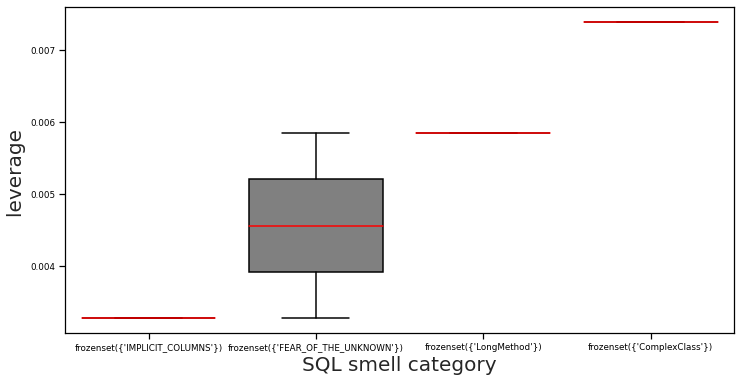

In [ ]:
r=rules.head(5)
# print(r)
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
plot= sns.boxplot(x= r['consequents'].astype(str), y=r['leverage'], data=df, color='black',medianprops=dict(color='red'), 
                  boxprops = dict(facecolor='gray',edgecolor='black' ))
#plot.set_title("Percentage of the ratio of fear of the unknown smells to number of queries")
#plot.set(xlabel="Category", ylabel="Percentage of smells to queries")
plot.set_xlabel("SQL smell category",fontsize=20)
plot.set_ylabel("leverage ",fontsize=20)
fig = plot.get_figure()
# plt.plot(r["consequents"].astype(str), r["lift"])